<a href="https://colab.research.google.com/github/MusaibSyd/Deeplearning/blob/main/Fashion_Mnist_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.max(), x_test.max()

(255, 255)

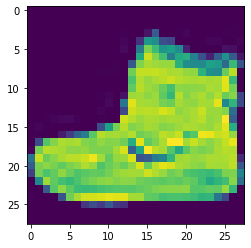

In [4]:
plt.imshow(x_train[0])

In [5]:
x_test.max()

255

In [6]:
x_train = x_train/255

In [7]:
x_test = x_test/255

In [8]:
x_train.max()

1.0

In [9]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
model = Sequential ()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
               optimizer='adam',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [15]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [16]:
model.fit(x_train,y_cat_train,validation_data=(x_test,y_cat_test),
          epochs=25, 
          callbacks=[early_stop])

Epoch 1/25
1875/1875 [==============================] - 49s 25ms/step - loss: 0.4148 - accuracy: 0.8528 - val_loss: 0.3404 - val_accuracy: 0.8788
Epoch 2/25
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2836 - accuracy: 0.8964 - val_loss: 0.2818 - val_accuracy: 0.8979
Epoch 3/25
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2411 - accuracy: 0.9114 - val_loss: 0.2756 - val_accuracy: 0.8995
Epoch 4/25
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2064 - accuracy: 0.9223 - val_loss: 0.2746 - val_accuracy: 0.9005
Epoch 5/25
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1791 - accuracy: 0.9327 - val_loss: 0.2732 - val_accuracy: 0.9034
Epoch 6/25
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1551 - accuracy: 0.9423 - val_loss: 0.2613 - val_accuracy: 0.9123
Epoch 7/25
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1337 - accuracy: 0.9514 - val_loss: 0.2804 -

In [17]:
metrics = pd.DataFrame(model.history.history)

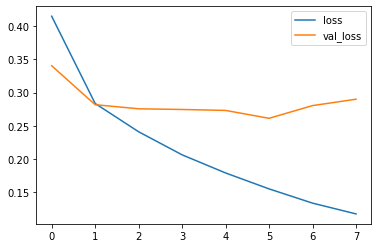

In [18]:
metrics[['loss', 'val_loss']].plot()

In [19]:
from sklearn.metrics import classification_report

In [20]:
predictions = (model.predict(x_test) > 0.5).astype("int32")


313/313 [==============================] - 3s 8ms/step


In [22]:
print(classification_report(y_cat_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1000
           1       0.98      0.99      0.98      1000
           2       0.77      0.92      0.84      1000
           3       0.94      0.89      0.91      1000
           4       0.91      0.78      0.84      1000
           5       0.97      0.98      0.98      1000
           6       0.81      0.71      0.76      1000
           7       0.97      0.96      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.97      0.97      0.97      1000

   micro avg       0.92      0.90      0.91     10000
   macro avg       0.92      0.90      0.91     10000
weighted avg       0.92      0.90      0.91     10000
 samples avg       0.90      0.90      0.90     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
